#Besoin _client 3

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Lire les données
df = pd.read_csv('./Data_Arbre.csv')
df['fk_arb_etat'].unique()

array(['EN PLACE', 'REMPLACÉ', 'Essouché', 'SUPPRIMÉ', 'ABATTU',
       'Non essouché'], dtype=object)

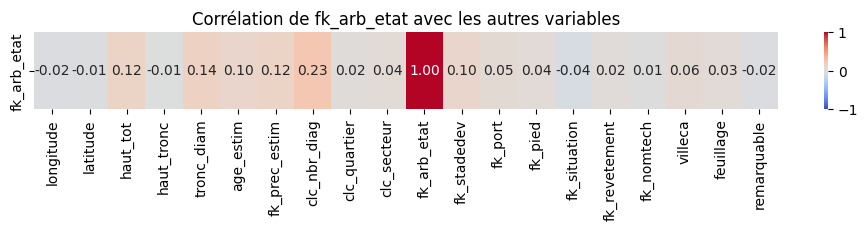

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Sélectionner les variables quantitatives
quantitative_vars = df.select_dtypes(include=['float64', 'int64'])

# Sélectionner et encoder les variables qualitatives
qualitative_vars = df.select_dtypes(include=['object', 'category']).apply(LabelEncoder().fit_transform)
#for column in qualitative_vars.columns:
#    le = LabelEncoder()
#    qualitative_vars[column] = le.fit_transform(qualitative_vars[column])
#    label_encoders[column] = le

# Combiner les variables quantitatives et qualitatives encodées
combined_vars = pd.concat([quantitative_vars, qualitative_vars], axis=1)

# Calculer la matrice de corrélation
correlation_matrix = combined_vars.corr()

# Afficher uniquement la ligne de 'fk_arb_etat'
plt.figure(figsize=(12, 1))
sns.heatmap(correlation_matrix.loc[['fk_arb_etat']], annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Corrélation de fk_arb_etat avec les autres variables')
plt.show()


tout au dessus 0.1

In [4]:
# Fonction pour filtrer les variables avec corrélation
def filter_highly_correlated(corr_matrix, target_var, threshold):
    # Sélectionner les variables avec une corrélation absolue supérieure au seuil
    high_corr_vars = corr_matrix[target_var][abs(corr_matrix[target_var]) > threshold].index
    return high_corr_vars

In [5]:
# Sélectionner les colonnes pertinentes
high_corr_vars = filter_highly_correlated(correlation_matrix, 'fk_arb_etat', 0.09) # 0.09 pour prendre en compte les erreurs d'arrondi dans l'affichage de la matrice
print(high_corr_vars)

data = df[high_corr_vars].copy()
print(data.head())

Index(['haut_tot', 'tronc_diam', 'age_estim', 'fk_prec_estim', 'clc_nbr_diag',
       'fk_arb_etat', 'fk_stadedev'],
      dtype='object')
   haut_tot  tronc_diam  age_estim  fk_prec_estim  clc_nbr_diag fk_arb_etat  \
0       6.0        37.0       15.0            5.0           0.0    EN PLACE   
1      13.0       160.0       50.0           10.0           0.0    EN PLACE   
2      12.0       116.0       30.0           10.0           0.0    REMPLACÉ   
3      16.0       150.0       50.0            2.0           0.0    EN PLACE   
4       5.0       170.0       40.0            2.0           0.0    Essouché   

  fk_stadedev  
0       Jeune  
1      Adulte  
2      Adulte  
3      Adulte  
4      Adulte  


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Encodage des colonnes catégorielles
label_encoders = {}
for column in ['fk_prec_estim', 'fk_stadedev', 'fk_arb_etat']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Séparation des caractéristiques (X) et de la variable cible (y)
X = data.drop('fk_arb_etat', axis=1)
y = data['fk_arb_etat']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


#Entrainer le modèle de classification

# Initialiser et entraîner le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédire et évaluer le modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9041835357624831


In [8]:
import joblib
# Enregistrer le modèle
joblib.dump(model, 'random_forest_model.pkl')

# Enregistrer le scaler
joblib.dump(scaler, 'scaler.pkl')

# Enregistrer les label encoders
for column, le in label_encoders.items():
    joblib.dump(le, f'label_encoder_{column}.pkl')

# Même chose avec  pour régression, mais tout ça uniquement sur ton fichier ou tu as mis que fk_arbre_etat = essouché ou non essouché.

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import os

# Filtrer les données pour inclure seulement 'essouché' ou 'non essouché'
filtered_df = df[df['fk_arb_etat'].isin(['Essouché', 'Non essouché'])].copy()

# Enregistrer les données filtrées dans un nouveau fichier CSV
filtered_df.to_csv('./Filtered_Data_Arbre.csv', index=False)
print("Le fichier CSV filtré a été créé avec succès.")

# Lire les données filtrées
df2 = pd.read_csv('./Filtered_Data_Arbre.csv')

# Sélectionner les colonnes pertinentes
data2 = df2[high_corr_vars].copy()


Le fichier CSV filtré a été créé avec succès.


In [10]:
# Encodage des colonnes catégorielles
categorical_columns = ['fk_prec_estim', 'fk_stadedev']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data2[column] = le.fit_transform(data2[column])
    label_encoders[column] = le

# Encodage de la colonne cible 'fk_arb_etat'
le_arb_etat = LabelEncoder()
data2['fk_arb_etat'] = le_arb_etat.fit_transform(data2['fk_arb_etat'])

# Séparation des caractéristiques (X) et de la variable cible (y)
X = data2.drop('fk_arb_etat', axis=1)
y = data2['fk_arb_etat']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#changement ici///////////////////////////////////////////////////
X_data_avant = data.drop('fk_arb_etat', axis=1)
y_data_avant = data['fk_arb_etat']

X_scaled_avant = scaler.fit_transform(X_data_avant)


X_train_avant, X_test_avant, y_train_avant, y_test_avant = train_test_split(X_scaled_avant, y_data_avant, test_size=0.2, random_state=42)

In [11]:
# Initialiser et entraîner le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Faire des prédictions et évaluer le modèle
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# TEST
# Faire des prédictions et évaluer le modèle
y_pred_avant = model.predict(X_test_avant)
mse = mean_squared_error(y_test_avant, y_pred_avant)
print(f'Mean Squared Error avant: {mse}')

Mean Squared Error: 0.12817692307692308
Mean Squared Error avant: 2.2385582321187587


In [12]:
# Enregistrer le modèle et les transformateurs
joblib.dump(model, 'random_forest_regressor.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_arb_etat, 'label_encoder_fk_arb_etat.pkl')

# Enregistrer les label encoders pour les colonnes catégorielles
for column, le in label_encoders.items():
    joblib.dump(le, f'label_encoder_{column}.pkl')

print("Modèle et transformateurs enregistrés avec succès.")

# Ajouter la colonne "déraciner" à un nouveau fichier CSV si celui-ci n'existe pas déjà
output_file = './Data_Arbre_Modified.csv'
if os.path.exists(output_file):
    print(f"Le fichier {output_file} existe déjà. Aucune action n'a été effectuée.")
else:
    # Lire les données
    newDataArbre = pd.read_csv('./Data_Arbre.csv')
    # Ajouter la colonne "déraciner" initialisée à 0
    newDataArbre['déraciner'] = 0

    # Enregistrer les données modifiées dans un nouveau fichier CSV
    newDataArbre.to_csv(output_file, index=False)
    print("Le fichier CSV modifié a été créé avec succès.")



Modèle et transformateurs enregistrés avec succès.
Le fichier ./Data_Arbre_Modified.csv existe déjà. Aucune action n'a été effectuée.


In [14]:
# Charger le modèle et les transformateurs
loaded_model = joblib.load('random_forest_regressor.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_label_encoder_arb_etat = joblib.load('label_encoder_fk_arb_etat.pkl')
loaded_label_encoders = {column: joblib.load(f'label_encoder_{column}.pkl') for column in categorical_columns}

# Exemple de prédiction avec les données chargées
# Utilisation des mêmes colonnes d'intérêt
data_test = df2[high_corr_vars].copy()

# Encodage des colonnes catégorielles
for column in categorical_columns:
    data_test[column] = loaded_label_encoders[column].transform(data_test[column])

# Encodage de la colonne cible 'fk_arb_etat'
data_test['fk_arb_etat'] = loaded_label_encoder_arb_etat.transform(data_test['fk_arb_etat'])

# Séparation des caractéristiques
X_new = data_test.drop('fk_arb_etat', axis=1)

# Normalisation des données
X_new_scaled = loaded_scaler.transform(X_new)


# Prédiction
y_new_pred = loaded_model.predict(X_new_scaled)
print(y_new_pred)


[0.27 0.09 0.04 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.64 0.15 0.   0.   0.   0.02 0.
 0.   0.   0.   0.   0.45 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.
 0.   0.56 0.56 0.   0.38 0.04 0.32 0.39 0.15 0.11 0.01 0.05 0.14 0.
 0.65 0.01 0.09 0.09 0.09 0.08 0.37 0.34 0.21 0.21 0.   0.   0.   0.
 0.47 0.   0.02 0.06 0.11 0.17 0.62 0.81 0.06 0.27 0.   0.08 0.22 0.
 0.17 0.09 0.06 0.1  0.45 0.2  0.41 0.06 0.   0.31 0.01 0.   0.   0.12
 0.07 0.   0.   0.   0.   0.   0.   0.   0.02 0.02 0.64 0.12 0.   0.
 0.   0.   0.   0.04 0.   0.52 0.53 0.37 0.52 0.58 0.11 0.11 0.18 0.14
 0.13 0.31 0.02 0.   0.02 0.   0.01 0.29 0.23 0.07 0.25 0.44 0.07 0.19
 0.13 0.18 0.24 0.21 0.   0.   0.02 0.43 0.13 0.21 0.13 0.   0.   0.
 0.   0.02 0.   0.   0.   0.   0.   0.   0.47 0.02 0.13 0.24 0.16 0.16
 0.16 0.   0.   0.15 0.31 0.   0.09 0.64 0.02 0.12 0.   0.68 0.33 0.24
 0.24 0.71 0.68 0.63 0.68 0.51 0.49 0.41 0.68 0.36]


In [15]:
# Mettre à jour la colonne "déraciner" dans le DataFrame original
newDataArbre = pd.read_csv('./Data_Arbre.csv')
newDataArbre['déraciner'] = 0  # Initialisation
newDataArbre.loc[data_test.index, 'déraciner'] = (y_new_pred > 0.5).astype(int)

# Vérifier si le fichier existe et le fermer s'il est ouvert
if os.path.exists(output_file):
    try:
        os.remove(output_file)
    except PermissionError:
        print(f"Le fichier {output_file} est en cours d'utilisation. Veuillez le fermer et réessayer.")
        exit()

# Enregistrer les données modifiées dans un nouveau fichier CSV
newDataArbre.to_csv(output_file, index=False)
print("Le fichier CSV modifié avec les prédictions a été créé avec succès.")

# Générer une liste des arbres qui ont 'déraciner' = 1
deraciner_list = newDataArbre[newDataArbre['déraciner'] == 1]

# Afficher la liste des arbres déracinés
print("Liste des arbres déracinés:")
print(deraciner_list)

# Afficher le nombre d'arbres déracinés
nombre_arbre_deraciner = deraciner_list.shape[0]
print(f"Nombre total d'arbres déracinés : {nombre_arbre_deraciner}")

Le fichier CSV modifié avec les prédictions a été créé avec succès.
Liste des arbres déracinés:
     longitude   latitude                     clc_quartier  \
21    3.259444  49.832575  Quartier Saint-Martin - Oëstres   
43    3.253873  49.830463  Quartier Saint-Martin - Oëstres   
44    3.253999  49.830510  Quartier Saint-Martin - Oëstres   
56    3.258445  49.832272  Quartier Saint-Martin - Oëstres   
76    3.270951  49.844588  Quartier Saint-Martin - Oëstres   
77    3.299527  49.861096             Quartier de l'Europe   
108   3.293907  49.849977               Quartier Remicourt   
117   3.293962  49.850174               Quartier Remicourt   
118   3.293900  49.850235               Quartier Remicourt   
120   3.293592  49.850660               Quartier Remicourt   
121   3.293816  49.850456               Quartier Remicourt   
175   3.293294  49.851225               Quartier Remicourt   
179   3.293073  49.851048               Quartier Remicourt   
183   3.292761  49.851094           